# Breast Cancer
## Using Decision Tree Classifier
### With Correlation

##### Including the required Header Files

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

##### Loading the Data

In [4]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

##### Understanding the Data 

In [5]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data.target.shape

(569,)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
df=pd.DataFrame(data=np.c_[data.data,data.target] , columns=[list(data.feature_names)+['Target']])

In [10]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X.shape,y.shape

((569, 30), (569,))

##### Finding the correlation between training attributes.

In [13]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


##### Train and Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.29, random_state=2020)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((403, 30), (166, 30), (403,), (166,))

##### Removing the Correlated attributes from the training data set.

In [15]:
X_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.310937,0.997842,0.986439,0.157272,0.504971,0.658299,0.809580,0.108811,-0.313636,...,0.966895,0.265916,0.962585,0.937352,0.079216,0.421312,0.518877,0.728386,0.123413,0.005645
mean texture,0.310937,1.000000,0.316110,0.312758,-0.059558,0.203183,0.268241,0.260659,0.037155,-0.093826,...,0.332104,0.904994,0.338411,0.334572,0.021094,0.222280,0.241620,0.237667,0.021183,0.053062
mean perimeter,0.997842,0.316110,1.000000,0.985690,0.192646,0.556155,0.698051,0.838660,0.143287,-0.263503,...,0.967675,0.271760,0.968600,0.938980,0.110224,0.463404,0.556331,0.756437,0.146544,0.050045
mean area,0.986439,0.312758,0.985690,1.000000,0.160137,0.495781,0.669881,0.808845,0.116031,-0.284279,...,0.958350,0.257982,0.954905,0.954985,0.081402,0.397017,0.507298,0.705958,0.104199,0.004397
mean smoothness,0.157272,-0.059558,0.192646,0.160137,1.000000,0.629292,0.499837,0.549671,0.502202,0.574279,...,0.205123,0.007687,0.228138,0.197307,0.794901,0.444195,0.422871,0.503267,0.347946,0.500333
mean compactness,0.504971,0.203183,0.556155,0.495781,0.629292,1.000000,0.879465,0.833776,0.563241,0.559682,...,0.545425,0.214287,0.601698,0.521843,0.540883,0.862281,0.819959,0.826080,0.449138,0.685089
mean concavity,0.658299,0.268241,0.698051,0.669881,0.499837,0.879465,1.000000,0.911385,0.477272,0.365527,...,0.674556,0.251604,0.714217,0.666878,0.407621,0.736186,0.889301,0.853456,0.343998,0.523741
mean concave points,0.809580,0.260659,0.838660,0.808845,0.549671,0.833776,0.911385,1.000000,0.436534,0.185999,...,0.821647,0.250815,0.847050,0.801340,0.428737,0.663783,0.747377,0.908625,0.329158,0.383004
mean symmetry,0.108811,0.037155,0.143287,0.116031,0.502202,0.563241,0.477272,0.436534,1.000000,0.469555,...,0.161796,0.068615,0.193171,0.160685,0.397052,0.432628,0.411786,0.415387,0.699740,0.423981
mean fractal dimension,-0.313636,-0.093826,-0.263503,-0.284279,0.574279,0.559682,0.365527,0.185999,0.469555,1.000000,...,-0.244669,-0.054540,-0.195211,-0.219361,0.522205,0.446627,0.375280,0.206435,0.308939,0.783798


##### Visualizing the attributes using heatmap to find highly correlated attributes.

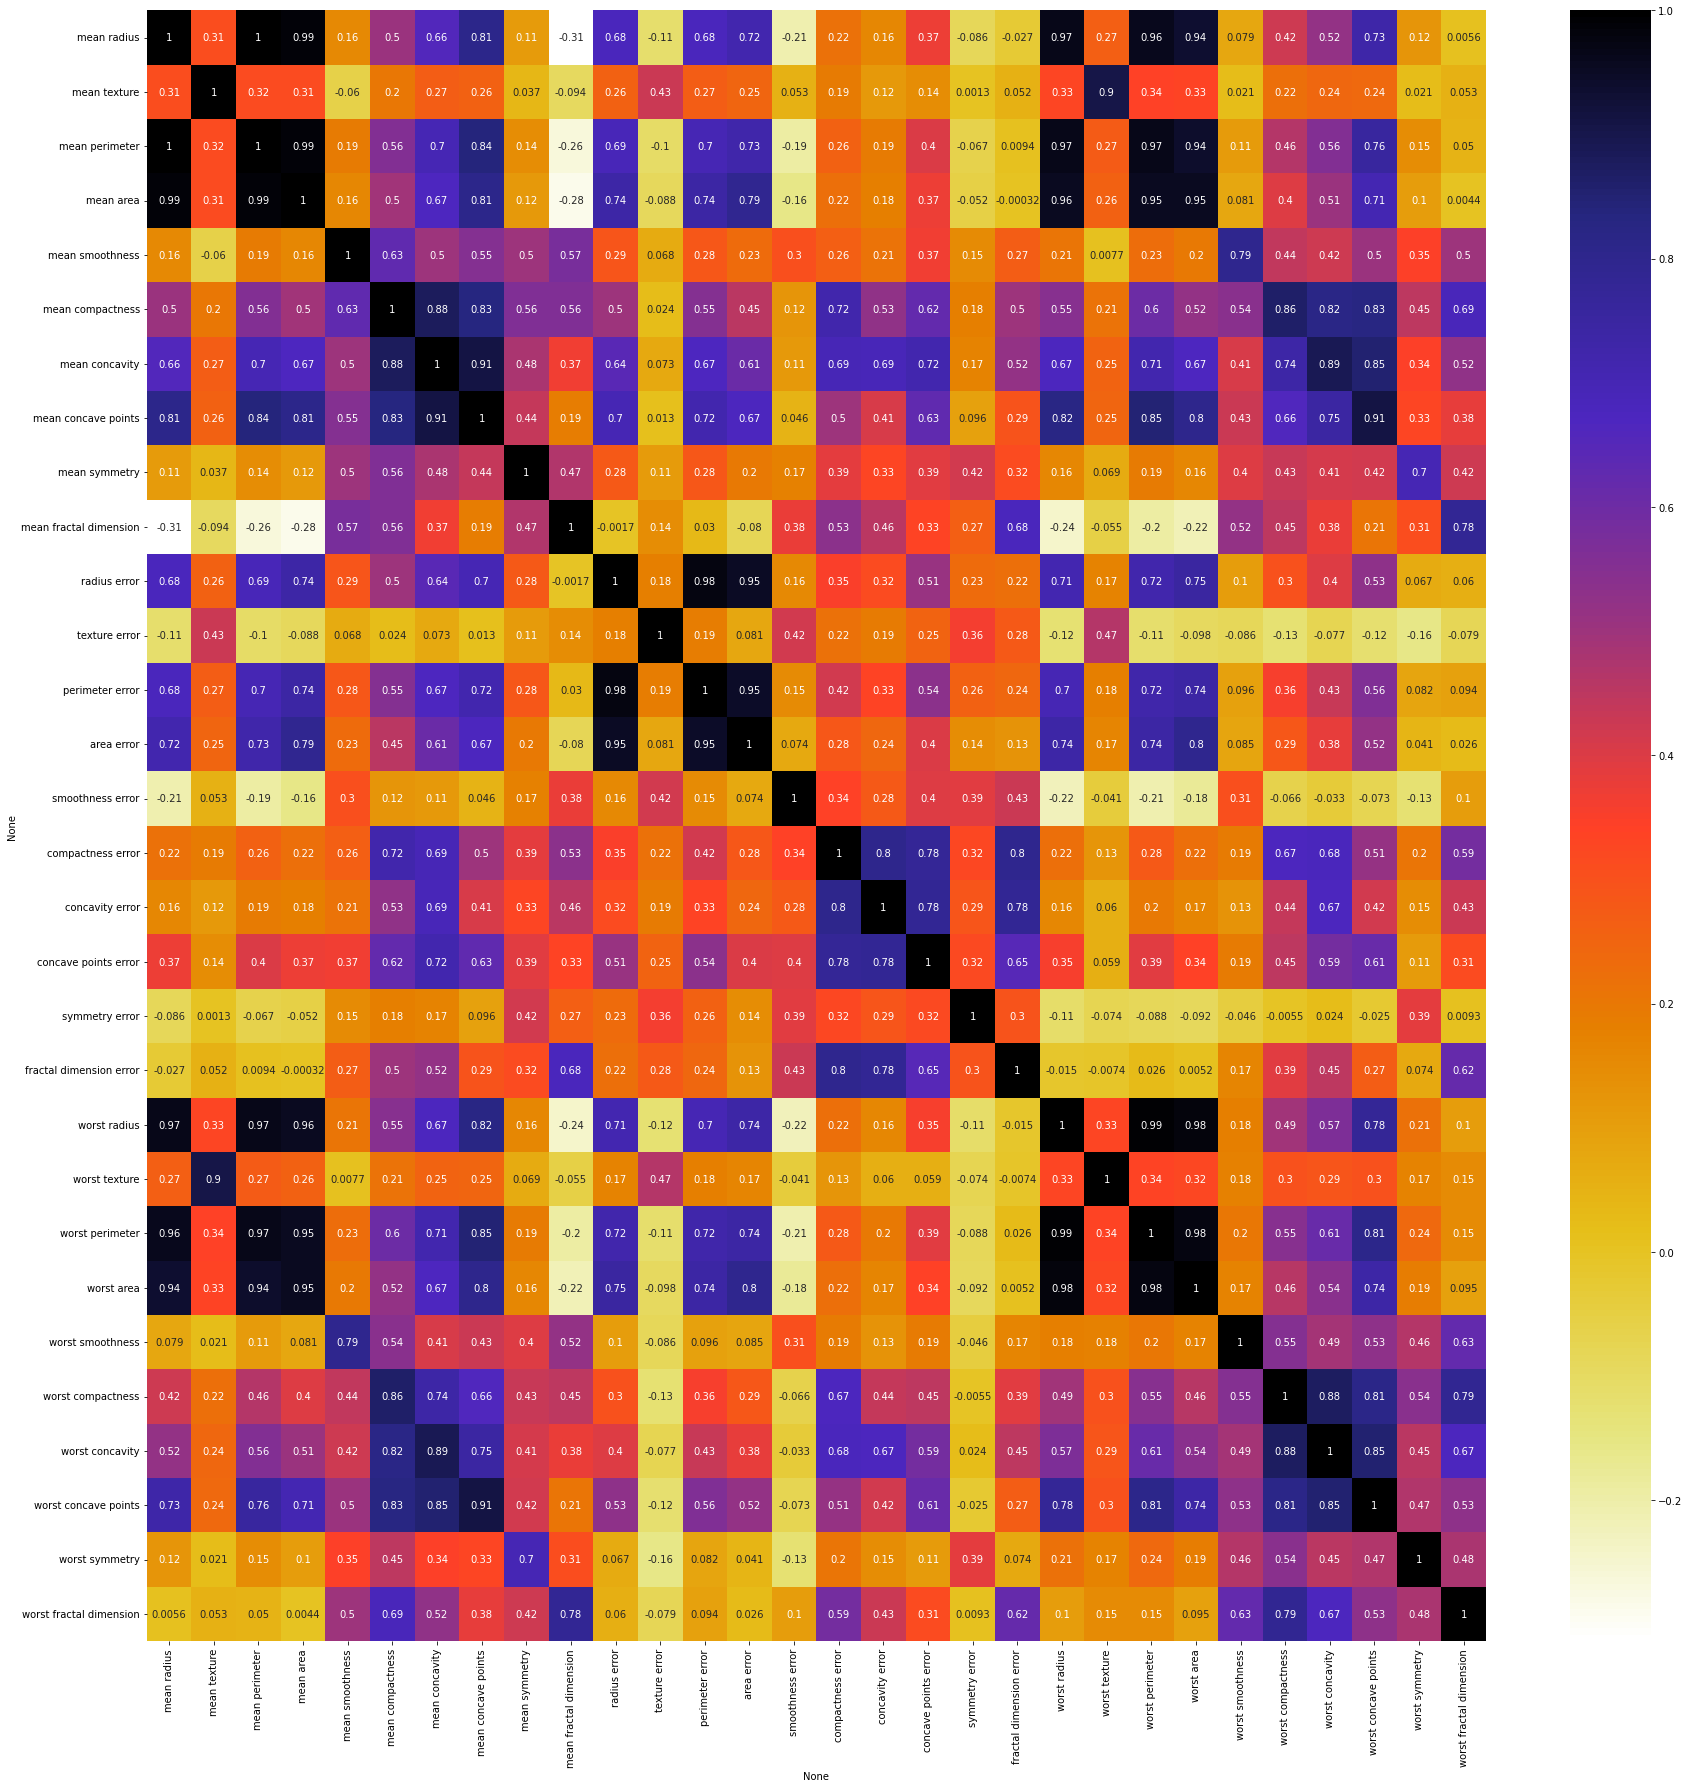

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()



In [17]:
def correlation(dataset,threshold):
    cor=set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if(abs(corr.iloc[i,j])>threshold):
                cor.add(corr.columns[i])
    return cor
                

In [18]:
cor=correlation(X_train,.88)
cor

{('area error',),
 ('mean area',),
 ('mean concave points',),
 ('mean perimeter',),
 ('perimeter error',),
 ('worst area',),
 ('worst concave points',),
 ('worst concavity',),
 ('worst perimeter',),
 ('worst radius',),
 ('worst texture',)}

In [19]:
X_train.drop(cor,axis=1)
X_test.drop(cor,axis=1)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst symmetry,worst fractal dimension
236,23.210,26.97,0.09509,0.16820,0.19500,0.1909,0.06309,1.0580,0.9635,0.006428,0.02863,0.044970,0.017160,0.01590,0.003053,0.14810,0.4126,0.3103,0.08677
106,11.640,18.33,0.11420,0.10170,0.07070,0.1801,0.06520,0.3060,1.6570,0.008540,0.02310,0.029450,0.013980,0.01565,0.003840,0.16880,0.2660,0.2806,0.09097
284,12.890,15.70,0.07818,0.09580,0.11150,0.1432,0.05935,0.2913,1.3890,0.006418,0.03961,0.079270,0.017740,0.01878,0.003696,0.09926,0.2317,0.1999,0.07127
262,17.290,22.13,0.08999,0.12730,0.09697,0.2108,0.05464,0.8348,1.6330,0.006717,0.05981,0.046380,0.021490,0.02747,0.005838,0.11340,0.2867,0.3067,0.07484
356,13.050,18.59,0.10820,0.13040,0.09603,0.2035,0.06501,0.3106,1.5100,0.007807,0.03932,0.051120,0.018760,0.02860,0.005715,0.13430,0.2658,0.3113,0.08317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,14.110,12.88,0.09309,0.05306,0.01765,0.1373,0.05700,0.2571,1.0810,0.006692,0.01132,0.005717,0.006627,0.01416,0.002476,0.12810,0.1109,0.2100,0.07083
56,19.210,18.57,0.10530,0.12670,0.13230,0.1917,0.05961,0.7275,1.1930,0.006458,0.02306,0.029450,0.015380,0.01852,0.002608,0.16240,0.3511,0.3537,0.08294
66,9.465,21.01,0.10440,0.07773,0.02172,0.1717,0.06899,0.2351,2.0110,0.010520,0.01755,0.017140,0.009333,0.02279,0.004237,0.15480,0.1664,0.2878,0.09211
87,19.020,24.59,0.09029,0.12060,0.14680,0.1953,0.05629,0.5495,0.6636,0.003872,0.01842,0.037100,0.012000,0.01964,0.003337,0.12490,0.3206,0.3956,0.09288


##### Using Decision Tree Classifier to fit the training data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [21]:
classifier.score(X_test,y_test)

0.9578313253012049

In [22]:
y_pred=classifier.predict(X_test)

##### Evaluate the model performance

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[65  2]
 [ 5 94]]
Accuracy score: 0.9578313253012049
Precision score: 0.9791666666666666
Recall score: 0.9494949494949495
